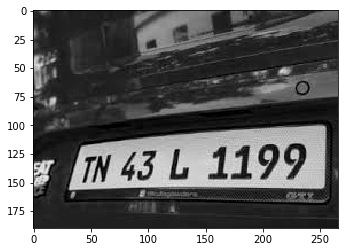

In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as img
    
image = img.imread('c:\\Users\\windows10\\desktop\\proj\\vehicle\\car2.jpg')
gray = plt.imshow(image[:,:,1], cmap='gray', vmin = 0, vmax = 255,interpolation='none')

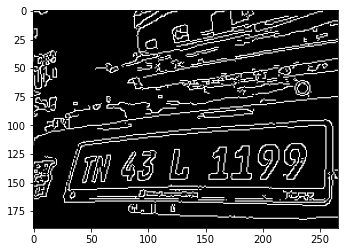

In [119]:
import cv2

bfilter = cv2.bilateralFilter(image, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [120]:
import imutils

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [121]:
location

array([[[255, 101]],

       [[ 45, 117]],

       [[ 30, 156]],

       [[253, 155]]], dtype=int32)

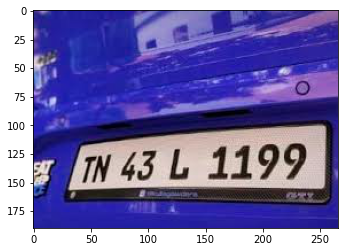

In [122]:
import numpy as np

mask = np.zeros(image.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


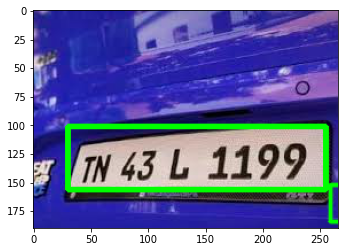

In [124]:
#mask=255
#(x, y) = np.where(mask==255)
#(x1, y1) = (np.min(x), np.min(y))
#(x2, y2) = (np.max(x), np.max(y))
#cropped_image = image[x1:x2+1, y1:y2+1]


import matplotlib.pyplot as plt
#%matplotlib.inline
import IPython
#plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

import easyocr

reader = easyocr.Reader(['en'])
#result = reader.readtext(cropped_image)
result = reader.readtext(new_image)
result

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))